In [661]:
#schillinger 
import numpy as np
from music21 import *
from itertools import chain
%load_ext music21.ipython21


The music21.ipython21 extension is already loaded. To reload it, use:
  %reload_ext music21.ipython21


In [635]:
#schillinger functions

class SchillingerRythm:
    
    common_product = []
    generators = []
    resultant = []
    
    complementary_generators = []
    complementary_resultant = []
    
    def __init__(self, fraction):
        self.common_product = []
        self.generators = []
        self.resultant = []
        self.complementary_generators = []
        self.complementary_resultant = []
        
        self.binary_syncronisation(fraction)

    def binary_syncronisation_result(self, fraction, seq_len):
        result = [] 
        count = 1
        flag = True
        for i in range(1, seq_len):
            for m in fraction:
                if i % m == 0:
                    flag = True
                    break
                else:
                    flag = False
            if flag:
                result.append(count)
                count = 1
            else:
                count += 1
        result.append(count)
        return result

    def binary_syncronisation(self, fraction):
        seq_len = np.prod(fraction)
        # fill in lists
        #print(seq_len)
        self.common_product = [1]*seq_len
        complementary_fraction = []
        for generator in fraction:
            num = int(seq_len/generator)
            self.generators.append([generator]*num)
            #complementary
            com_num = int(seq_len/num)
            complementary_fraction.append(num)
            self.complementary_generators.append([num]*com_num)
            
        self.resultant = self.binary_syncronisation_result(fraction, seq_len)
        self.complementary_resultant = self.binary_syncronisation_result(complementary_fraction, seq_len)


In [718]:
#notes

def convert2Dto1D(data):
    flat_array = []
    for d in data:
        if isinstance(d[0], list):
            for l in d:
                flat_array.append(l)
        else:
            flat_array.append(d)
    return flat_array
    

def showNotes(data):
    attacks = convert2Dto1D(data)
    #TS = str(int(len(clock))) +'/'+ str(int((clock[0].duration.quarterLength*16)))
    TS = '8/1'
    
    s = stream.Score(id='mainScore')
    
    for sequences in attacks:
        p0 = stream.Part(id='part0')
        p0.timeSignature = meter.TimeSignature(TS)
        tones = []
        for notes in sequences:
            
            nota = pitch.Pitch("C")
            nota.octave = 4
            nota = note.Note(nota.nameWithOctave)
            nota.duration.quarterLength = notes
            tones.append(nota)
            
        p0.append(tones)

        s.insert(0, p0)

    # stream2.show('text')
    # stream2.show('midi')
    return s

In [ ]:
# plotting

import matplotlib.pyplot as plt

def convert_to_plot(data): # converting numbers  1 1 1 1 to oscillation 1 0 1 0 or 3 2 to 1 1 1 0 0
    plot_array = []
    bit = 1
    plot_array.append(0)
    for i, e in enumerate(data):
        seq = [bit%2]*e
        for s in seq:
            plot_array.append(s)
        bit+=1
    return plot_array


def show_graph(common_product, generators, resultant):
    
    length = len(convert_to_plot(common_product))
    x_vals = range(length)
    #fig, ax = plt.subplots(figsize=(20, 10))
    fig, ax = plt.subplots()
    ax.set_xlim(xmin=-1, xmax=length)
    ax.set_ylim(ymin=-((len(generators) * 2 )+ 3), ymax=2)
    
    ax.step(x_vals, convert_to_plot(common_product), color='black')
    
    count = 0
    for i,e in enumerate(generators):
        count+=2
        gen = convert_to_plot(e)
        ax.step(x_vals, [x-count for x in gen], color='black')
    
    count+=2
    ax.step(x_vals, [x-count for x in convert_to_plot(resultant)], color='black')
    
    ax.grid()
    #ax.set_xticks([x+x for x in convert_to_plot(resultant)])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks(range(len(common_product)+1))
    ax.grid(True)
    plt.show();
        

In [751]:
fraction = [4,3]
sr = SchillingerRythm(fraction)

print(sr.common_product, sr.generators, sr.resultant)
print(sr.common_product, sr.complementary_generators, sr.complementary_resultant)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [[4, 4, 4], [3, 3, 3, 3]] [3, 1, 2, 2, 1, 3]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [[3, 3, 3, 3], [4, 4, 4]] [3, 1, 2, 2, 1, 3]


normal


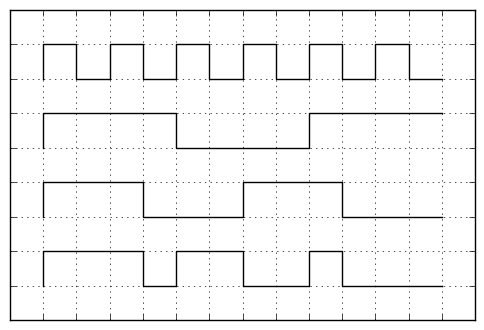

In [754]:
# plot results
if sr.resultant == sr.complementary_resultant: # check if result are same and plot complementary if not!
    attack_list = [sr.common_product, sr.generators, sr.resultant]
    print("normal")
    show_graph(sr.common_product, sr.generators, sr.resultant)
else:
    attack_list = [sr.common_product, sr.generators, sr.resultant, sr.common_product, sr.complementary_generators, sr.complementary_resultant]
    print("normal")
    show_graph(sr.common_product, sr.generators, sr.resultant)
    print("complementary")
    show_graph(sr.common_product, sr.complementary_generators, sr.complementary_resultant)

    


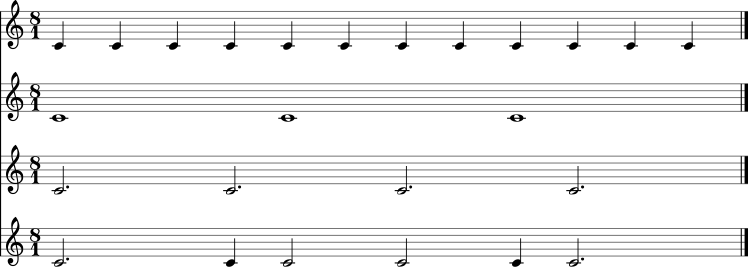

In [753]:
s = showNotes(attack_list)
s.show()